In [1]:
# parameters
data_path = "/home/jovyan/shared_data/data/"
lon_bds = (-26.0, -21.0)
lat_bds = (14.0, 17.5)
debug_max_timesteps = 12

In [2]:
import xarray as xr
import pandas as pd
import numpy as np

import hvplot.xarray
import geoviews as gv

import cartopy
import cmocean
from matplotlib import pyplot as plt

from pathlib import Path

In [3]:
import panel as pn
pn.extension()

In [4]:
ds_chl = xr.open_zarr(
    Path(data_path) / 
    # "copernicus/GLOBAL_ANALYSISFORECAST_BGC_001_028/cmems_mod_glo_bgc-pft_anfc_0.25deg_P1M-m_chl-phyc_180.00W-179.75E_80.00S-90.00N_0.49-5727.92m_2021-10-01-2023-12-01.zarr"
    "copernicus/GLOBAL_MULTIYEAR_BGC_001_029/cmems_mod_glo_bgc_my_0.25_P1M-m_multi-vars_180.00W-179.75E_80.00S-90.00N_0.51-5902.06m_1993-01-01-2022-12-01.zarr"
)
ds_chl = ds_chl.sel(
    longitude=slice(*lon_bds),
    latitude=slice(*lat_bds),
)
ds_chl

<xarray.Dataset>
Dimensions:    (time: 360, depth: 75, latitude: 15, longitude: 21)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * latitude   (latitude) float32 14.0 14.25 14.5 14.75 ... 17.0 17.25 17.5
  * longitude  (longitude) float32 -26.0 -25.75 -25.5 ... -21.5 -21.25 -21.0
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2022-12-01
Data variables:
    chl        (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 21), meta=np.ndarray>
    fe         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 21), meta=np.ndarray>
    no3        (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 21), meta=np.ndarray>
    nppv       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 21), meta=np.ndarray>
    o2         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 21), meta=np.ndarray>
    ph         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 21), meta=np.ndarray>
    phyc       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 21), meta=np.ndarray>
    po4        (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 21), meta=np.ndarray>
    si         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 21), meta=np.ndarray>
    spco2      (time, latitude, longitude) float32 dask.array<chunksize=(1, 15, 21), meta=np.ndarray>
Attributes: (12/15)
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    copernicusmarine_version:      1.0.3
    credit:                        E.U. Copernicus Marine Service Information...
    dataset:                       global-reanalysis-bio-001-029-monthly
    ...                            ...
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR FREEBIORYS2V4
    title:                         Monthly mean fields for product GLOBAL_REA...

In [5]:
ds_sst = xr.open_zarr(
    Path(data_path) / 
    # "copernicus/GLOBAL_ANALYSISFORECAST_BGC_001_028/cmems_mod_glo_bgc-pft_anfc_0.25deg_P1M-m_chl-phyc_180.00W-179.75E_80.00S-90.00N_0.49-5727.92m_2021-10-01-2023-12-01.zarr"
    "copernicus/GLOBAL_MULTIYEAR_PHY_001_030/cmems_mod_glo_phy_my_0.083deg_P1M-m_multi-vars_180.00W-179.92E_80.00S-90.00N_0.49-5727.92m_2014-01-01-2021-06-01.zarr"
)
ds_sst = ds_sst.sel(
    longitude=slice(*lon_bds),
    latitude=slice(*lat_bds),
)
ds_sst

<xarray.Dataset>
Dimensions:    (time: 90, latitude: 43, longitude: 61, depth: 50)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 14.0 14.08 14.17 14.25 ... 17.33 17.42 17.5
  * longitude  (longitude) float32 -26.0 -25.92 -25.83 ... -21.17 -21.08 -21.0
  * time       (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2021-06-01
Data variables:
    bottomT    (time, latitude, longitude) float32 dask.array<chunksize=(1, 43, 61), meta=np.ndarray>
    mlotst     (time, latitude, longitude) float32 dask.array<chunksize=(1, 43, 61), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(1, 43, 61), meta=np.ndarray>
    sithick    (time, latitude, longitude) float32 dask.array<chunksize=(1, 43, 61), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 43, 61), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 43, 61), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 43, 61), meta=np.ndarray>
    usi        (time, latitude, longitude) float32 dask.array<chunksize=(1, 43, 61), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 43, 61), meta=np.ndarray>
    vsi        (time, latitude, longitude) float32 dask.array<chunksize=(1, 43, 61), meta=np.ndarray>
    zos        (time, latitude, longitude) float32 dask.array<chunksize=(1, 43, 61), meta=np.ndarray>
Attributes: (12/15)
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    copernicusmarine_version:      1.0.3
    credit:                        E.U. Copernicus Marine Service Information...
    dataset:                       global-reanalysis-001-030-monthly
    ...                            ...
    product:                       GLOBAL_REANALYSIS_001_030
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLORYS12V1
    title:                         Monthly mean fields for product GLOBAL_REA...

In [6]:
print("number of common months:", len(set(ds_chl.time.data).intersection(set(ds_sst.time.data))))

number of common months: 90


In [7]:
ds_chl_time, ds_sst_time = xr.align(ds_chl.time, ds_sst.time)

In [8]:
ds_chl_time = ds_chl_time.isel(time=slice(None, debug_max_timesteps))
ds_sst_time = ds_sst_time.isel(time=slice(None, debug_max_timesteps))

In [9]:
ds_chl = ds_chl.sel(time=ds_chl_time)
ds_chl = ds_chl.compute()
ds_chl

<xarray.Dataset>
Dimensions:    (time: 12, depth: 75, latitude: 15, longitude: 21)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * latitude   (latitude) float32 14.0 14.25 14.5 14.75 ... 17.0 17.25 17.5
  * longitude  (longitude) float32 -26.0 -25.75 -25.5 ... -21.5 -21.25 -21.0
  * time       (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2014-12-01
Data variables:
    chl        (time, depth, latitude, longitude) float32 0.2419 0.2382 ... nan
    fe         (time, depth, latitude, longitude) float32 0.00038 ... nan
    no3        (time, depth, latitude, longitude) float32 0.01695 0.0173 ... nan
    nppv       (time, depth, latitude, longitude) float32 12.34 12.15 ... nan
    o2         (time, depth, latitude, longitude) float32 214.7 214.4 ... nan
    ph         (time, depth, latitude, longitude) float32 8.08 8.08 ... nan nan
    phyc       (time, depth, latitude, longitude) float32 1.472 1.467 ... nan
    po4        (time, depth, latitude, longitude) float32 0.01471 ... nan
    si         (time, depth, latitude, longitude) float32 1.423 1.433 ... nan
    spco2      (time, latitude, longitude) float32 34.83 34.81 ... 40.15 40.32
Attributes: (12/15)
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    copernicusmarine_version:      1.0.3
    credit:                        E.U. Copernicus Marine Service Information...
    dataset:                       global-reanalysis-bio-001-029-monthly
    ...                            ...
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR FREEBIORYS2V4
    title:                         Monthly mean fields for product GLOBAL_REA...

In [10]:
ds_sst = ds_sst.sel(time=ds_sst_time)
ds_sst = ds_sst.compute()
ds_sst

<xarray.Dataset>
Dimensions:    (time: 12, latitude: 43, longitude: 61, depth: 50)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 14.0 14.08 14.17 14.25 ... 17.33 17.42 17.5
  * longitude  (longitude) float32 -26.0 -25.92 -25.83 ... -21.17 -21.08 -21.0
  * time       (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2014-12-01
Data variables:
    bottomT    (time, latitude, longitude) float32 1.896 1.896 ... 2.447 2.443
    mlotst     (time, latitude, longitude) float32 37.08 35.1 ... 35.25 35.1
    siconc     (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    sithick    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    so         (time, depth, latitude, longitude) float32 35.57 35.56 ... nan
    thetao     (time, depth, latitude, longitude) float32 24.24 24.29 ... nan
    uo         (time, depth, latitude, longitude) float32 0.04883 ... nan
    usi        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    vo         (time, depth, latitude, longitude) float32 -0.03052 ... nan
    vsi        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    zos        (time, latitude, longitude) float32 -0.08545 -0.08667 ... -0.1181
Attributes: (12/15)
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    copernicusmarine_version:      1.0.3
    credit:                        E.U. Copernicus Marine Service Information...
    dataset:                       global-reanalysis-001-030-monthly
    ...                            ...
    product:                       GLOBAL_REANALYSIS_001_030
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLORYS12V1
    title:                         Monthly mean fields for product GLOBAL_REA...

In [11]:
time_slider = pn.widgets.IntSlider(name='time', start=0, end=ds_chl.dims["time"] - 1, step=1)

In [12]:
plt.ioff()

In [13]:
def plot_chl_sst_for_timestep(ds_chl=None, ds_sst=None, timestep=None):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    ds_chl.isel(depth=0).isel(time=timestep).chl.plot.contourf(ax=ax[0], cmap=cmocean.cm.algae) #, vmin=0, vmax=0.7)
    ds_sst.isel(depth=0).isel(time=timestep).thetao.plot.contourf(ax=ax[1], cmap=cmocean.cm.thermal) #, vmin=20, vmax=30)
    fig.tight_layout()
    return fig

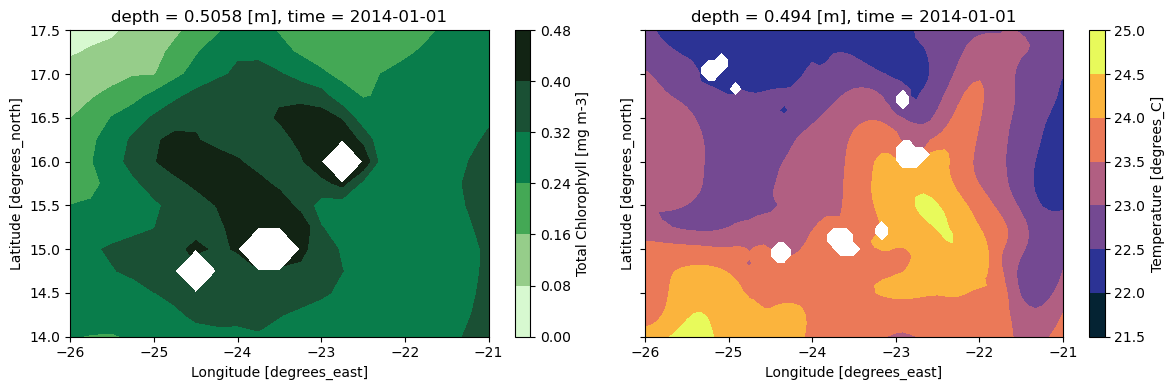

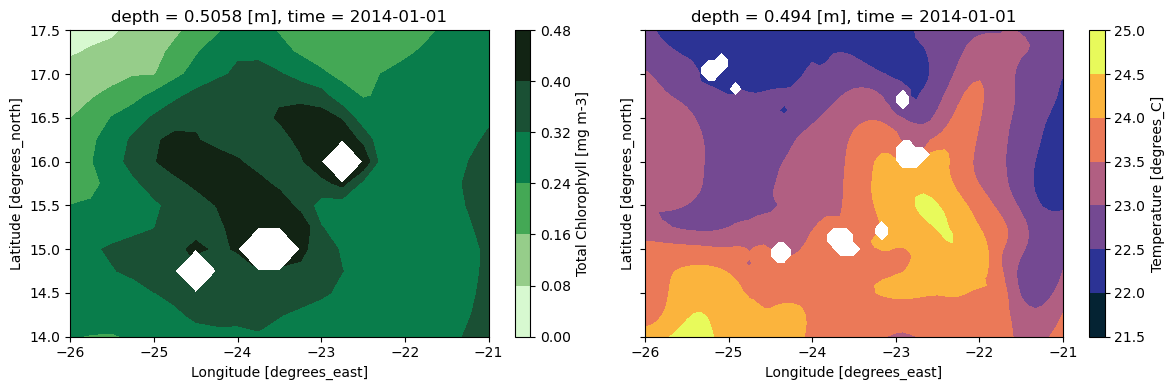

In [14]:
plot_chl_sst_for_timestep(ds_chl=ds_chl, ds_sst=ds_sst, timestep=0)

In [28]:
def plot_chl_sst_for_timestep_map(ds_chl=None, ds_sst=None, timestep=None):
    fig, ax = plt.subplots(
        1, 2,
        subplot_kw={"projection": cartopy.crs.PlateCarree()},
        figsize=(12, 4),
        sharey=True)
    
    ds_chl.isel(depth=0).isel(time=timestep).chl.plot.contourf(ax=ax[0], transform=cartopy.crs.PlateCarree(), cmap=cmocean.cm.algae) #, vmin=0, vmax=0.7)
    ds_sst.isel(depth=0).isel(time=timestep).thetao.plot.contourf(ax=ax[1], transform=cartopy.crs.PlateCarree(), cmap=cmocean.cm.thermal) #, vmin=20, vmax=30)

    ax[0].coastlines()
    ax[1].coastlines()
    ax[0].gridlines()
    ax[1].gridlines()
    ax[0].add_feature(cartopy.feature.LAND, zorder=100)
    ax[1].add_feature(cartopy.feature.LAND, zorder=100)
    # ax[0].add_grid()
    # ax[1].add_grid()
    
    fig.tight_layout()
    return fig

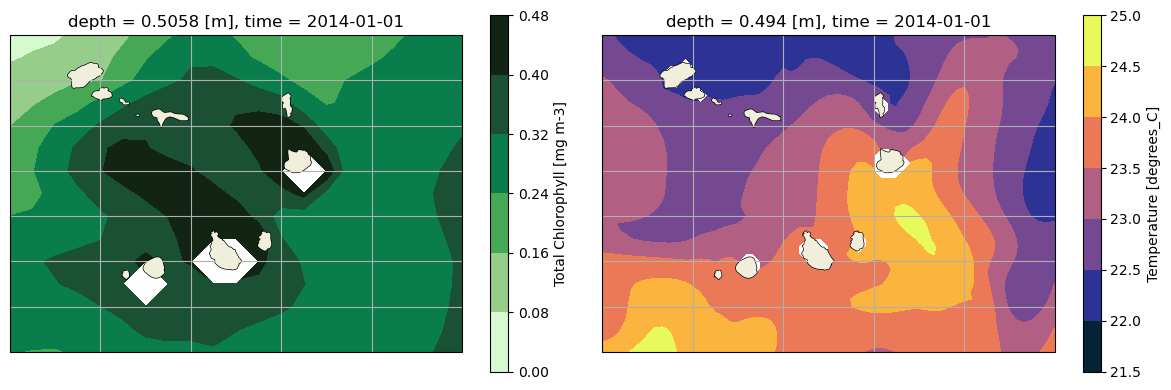

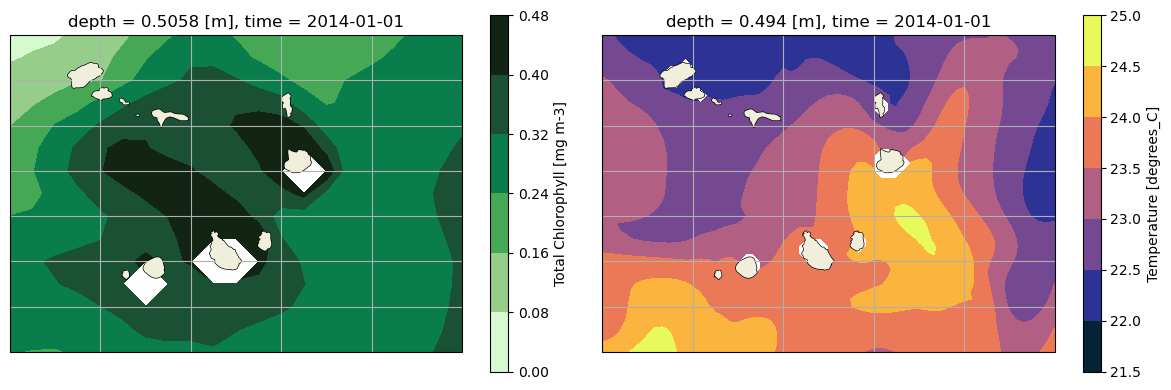

In [29]:
plot_chl_sst_for_timestep_map(ds_chl=ds_chl, ds_sst=ds_sst, timestep=0)

In [17]:
plot_maps_bound = pn.bind(plot_chl_sst_for_timestep_map, ds_chl=ds_chl, ds_sst=ds_sst, timestep=time_slider)

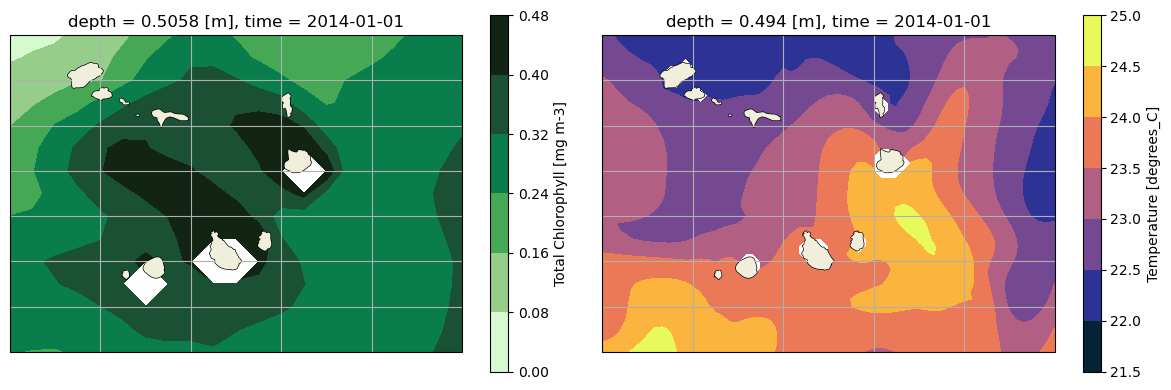

In [18]:
final_app = pn.Column(
    time_slider,
    pn.pane.Matplotlib(plot_maps_bound),
)

In [21]:
# final_app

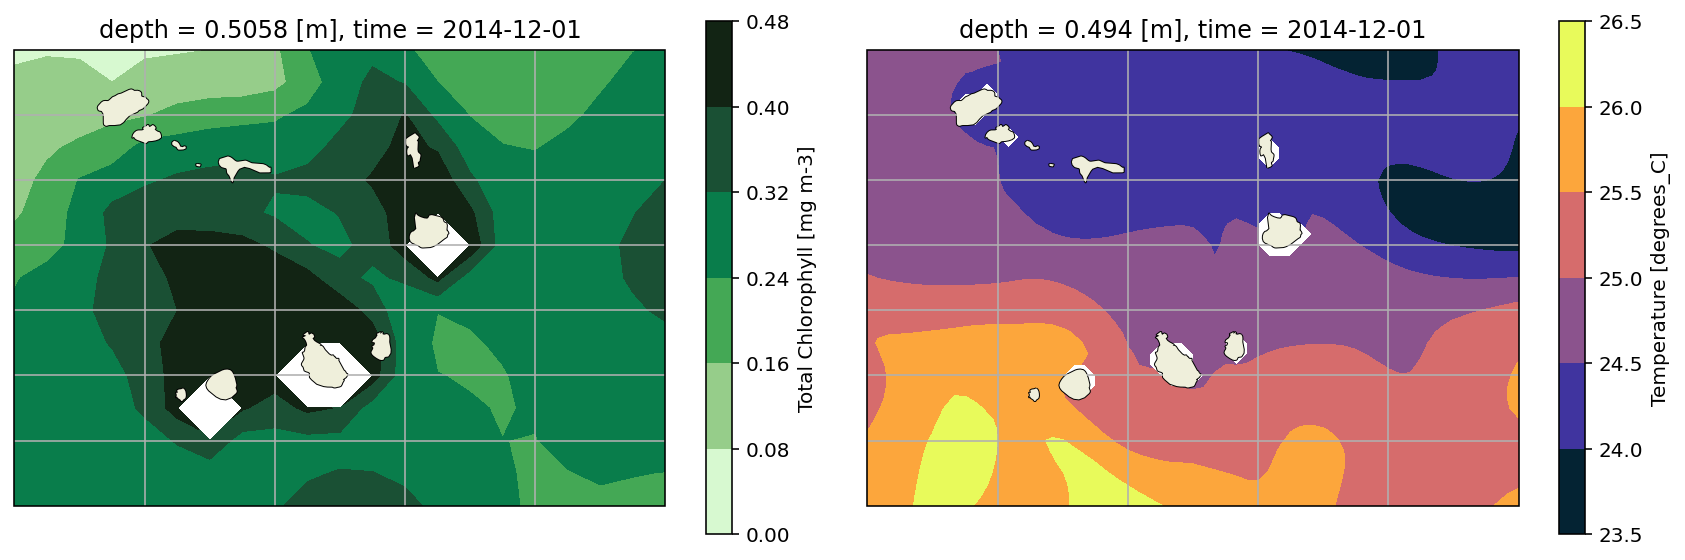

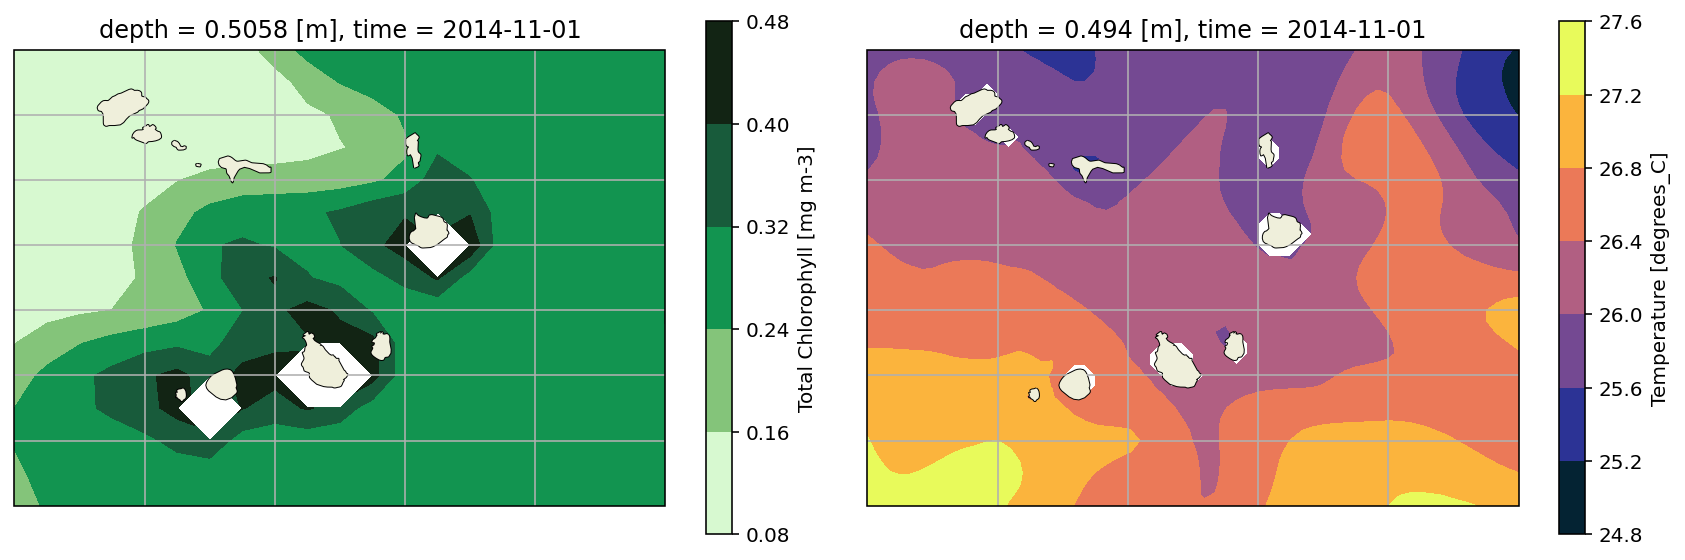

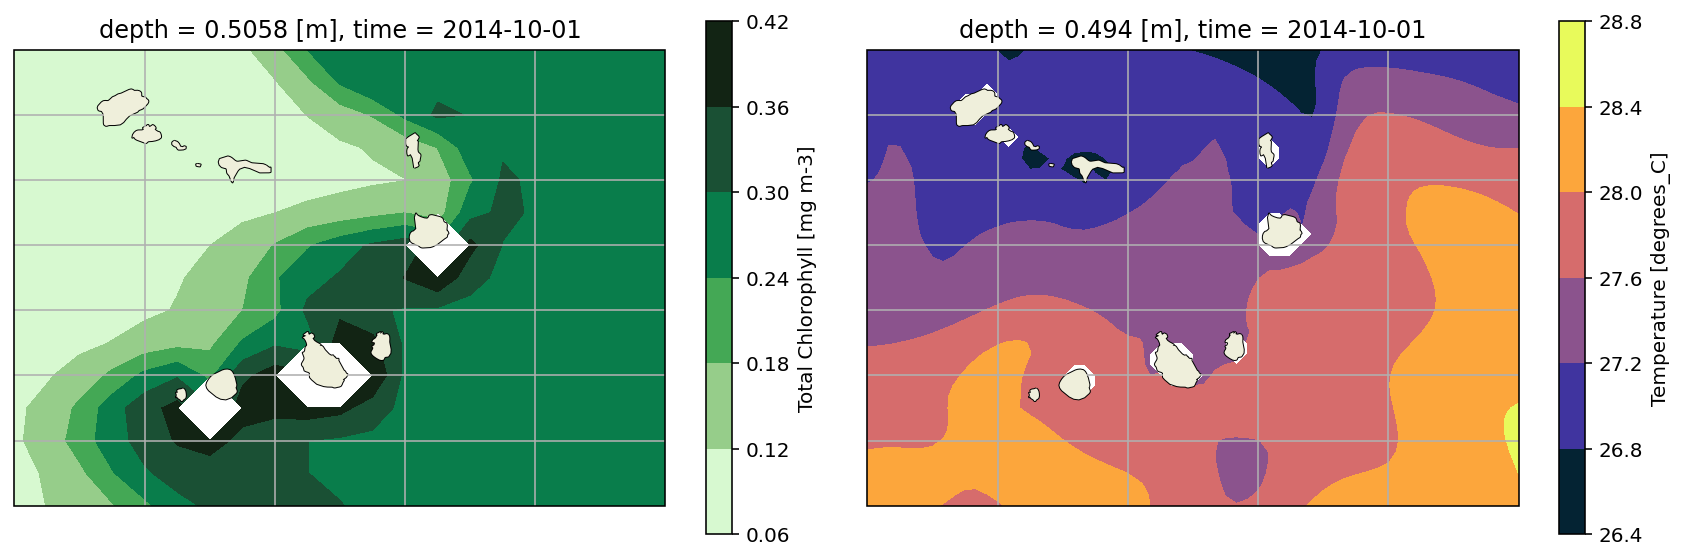

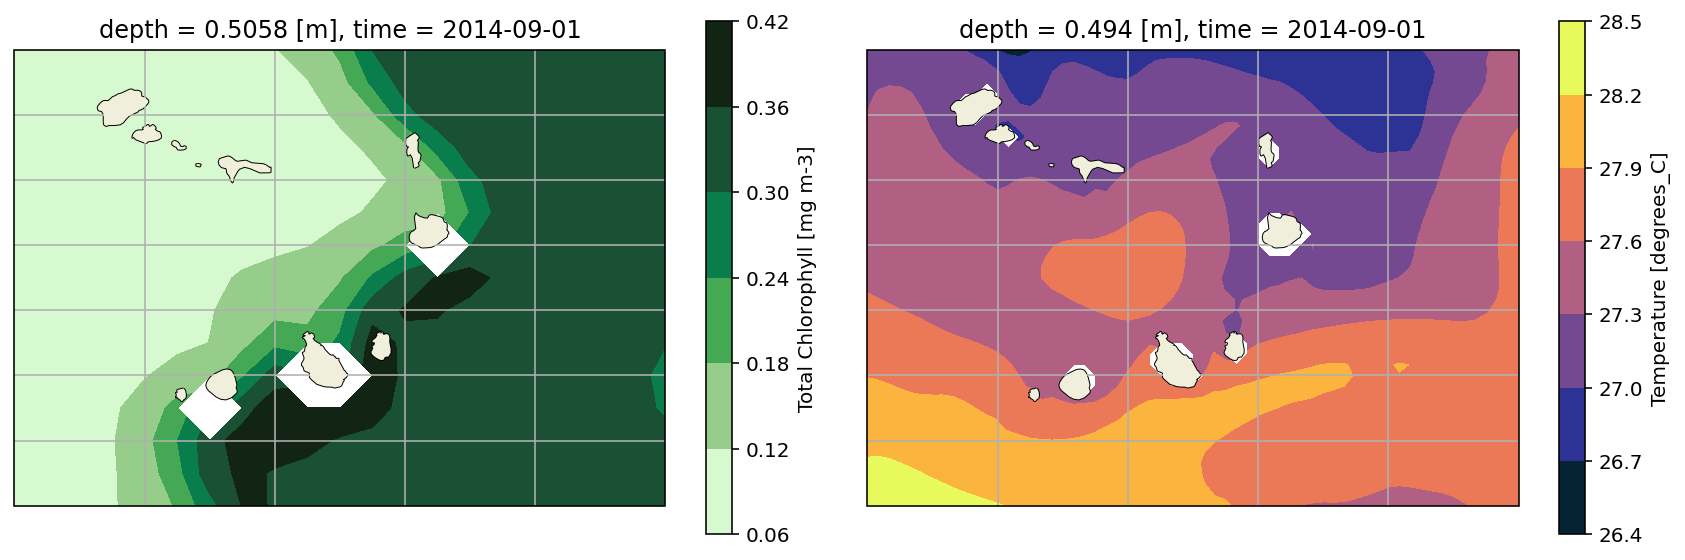

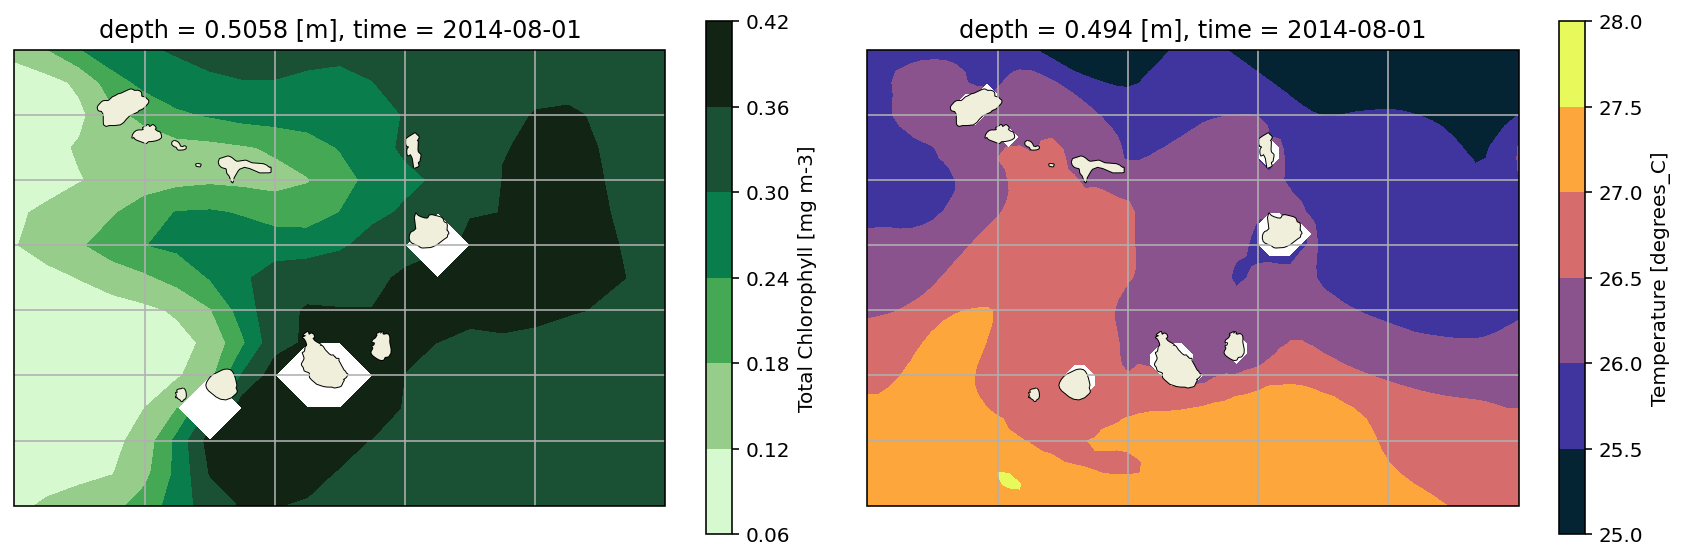

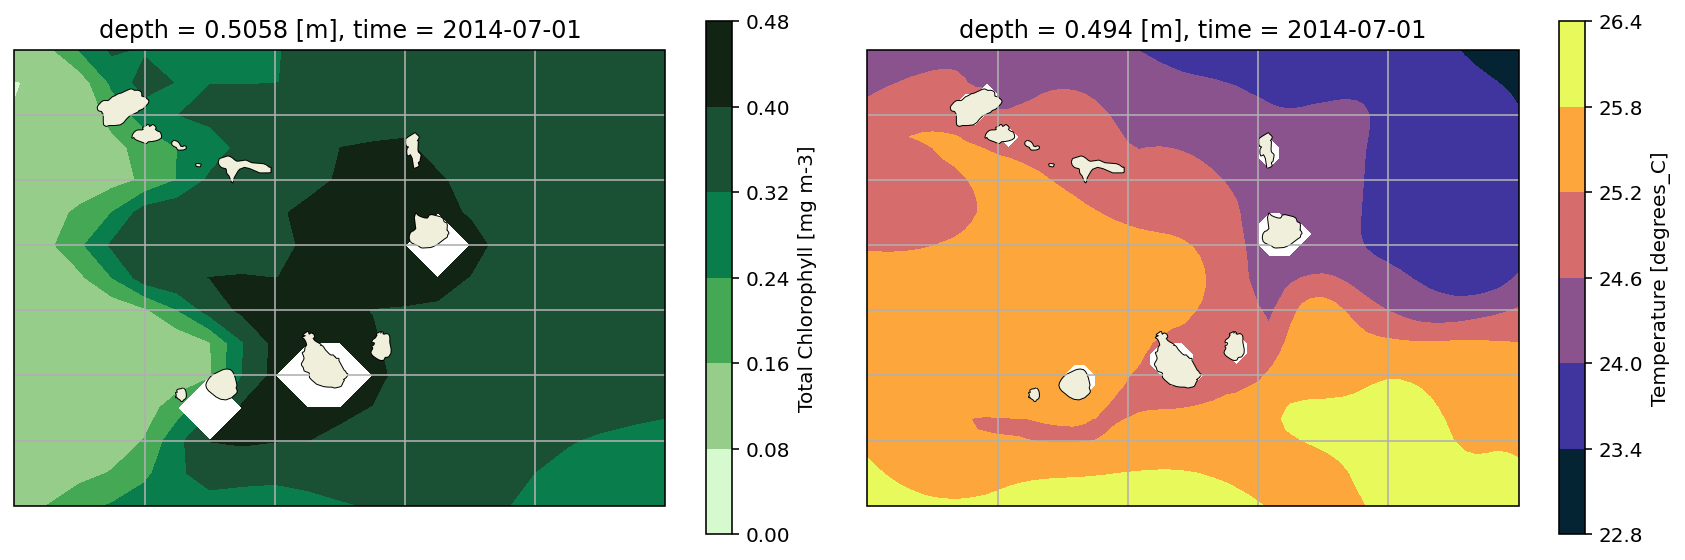

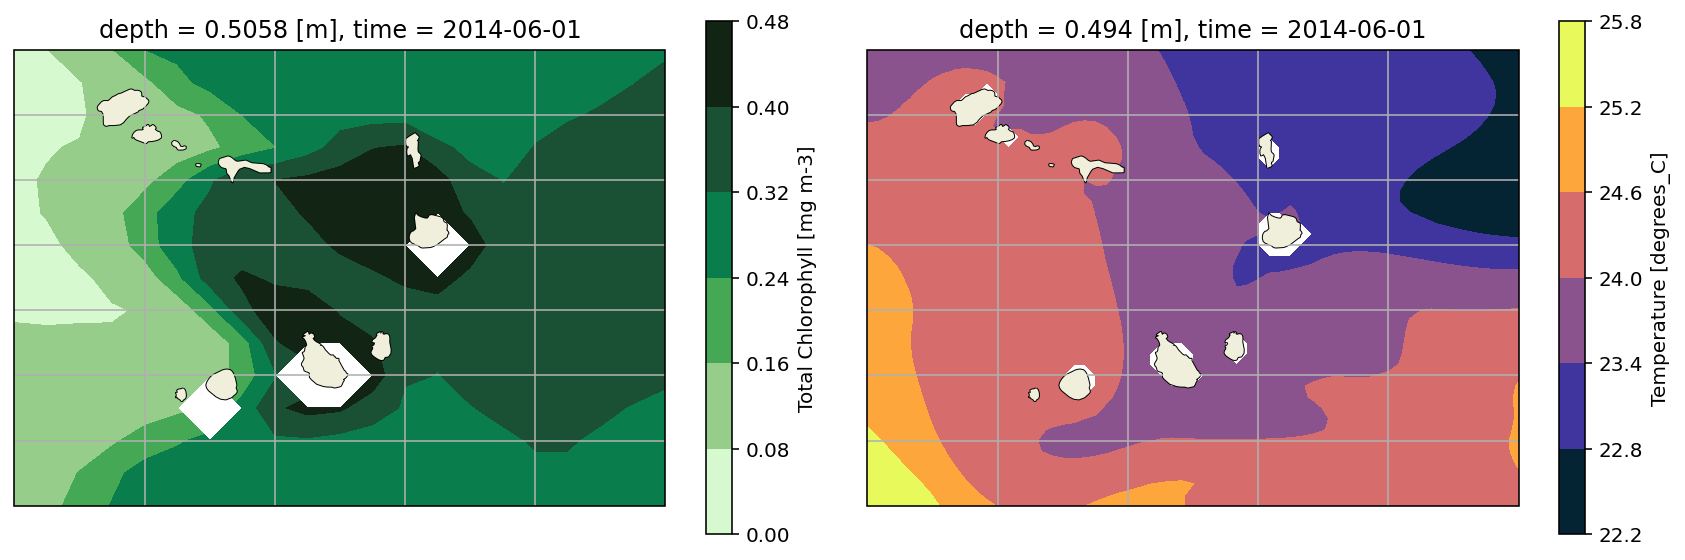

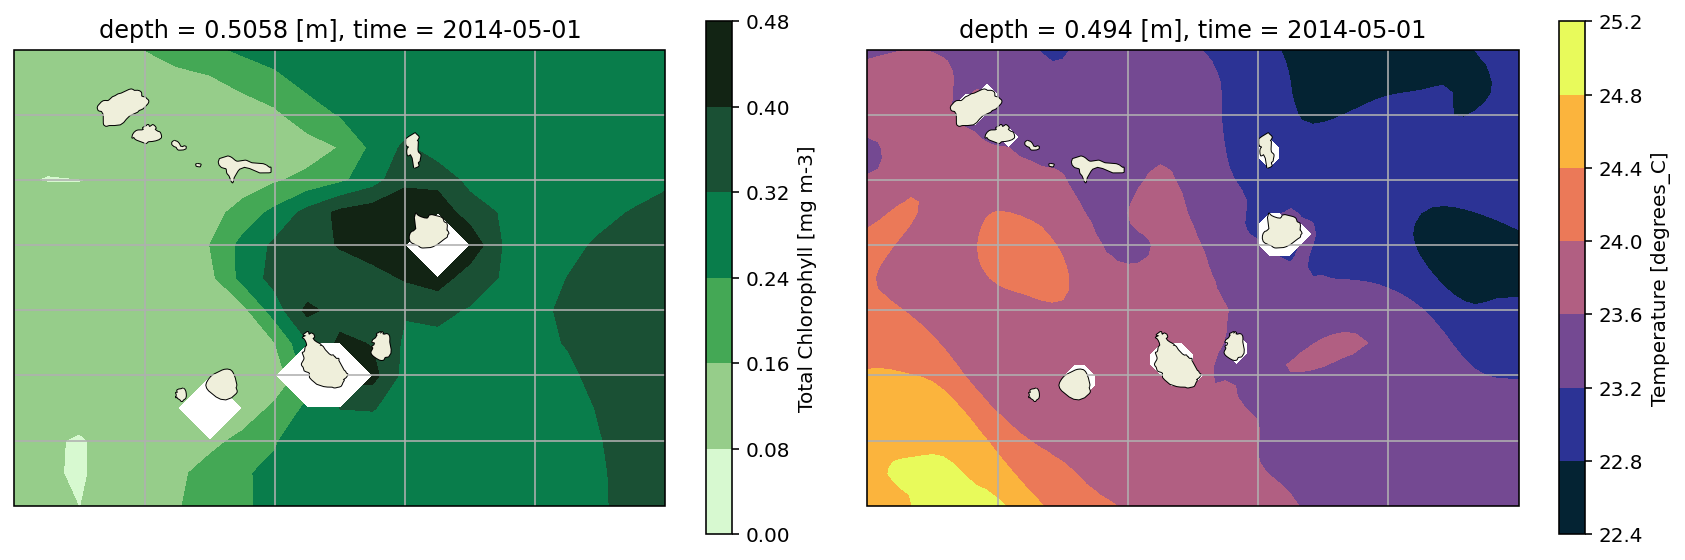

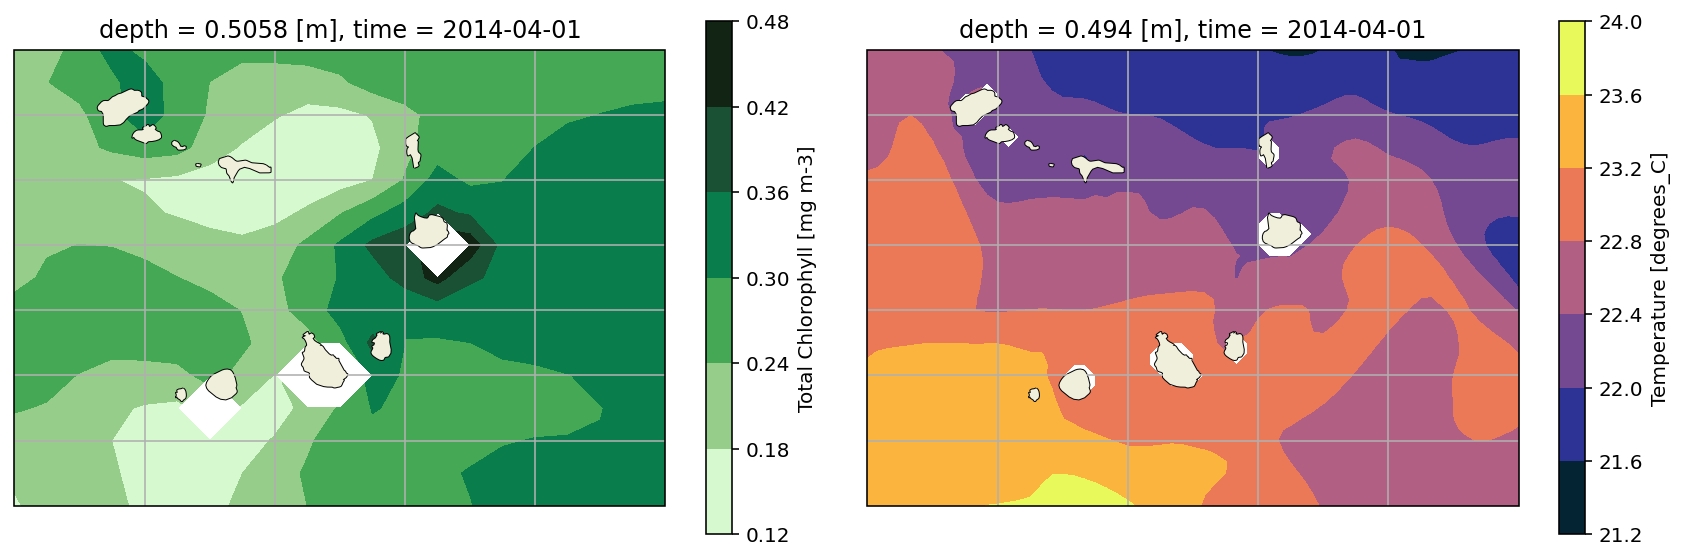

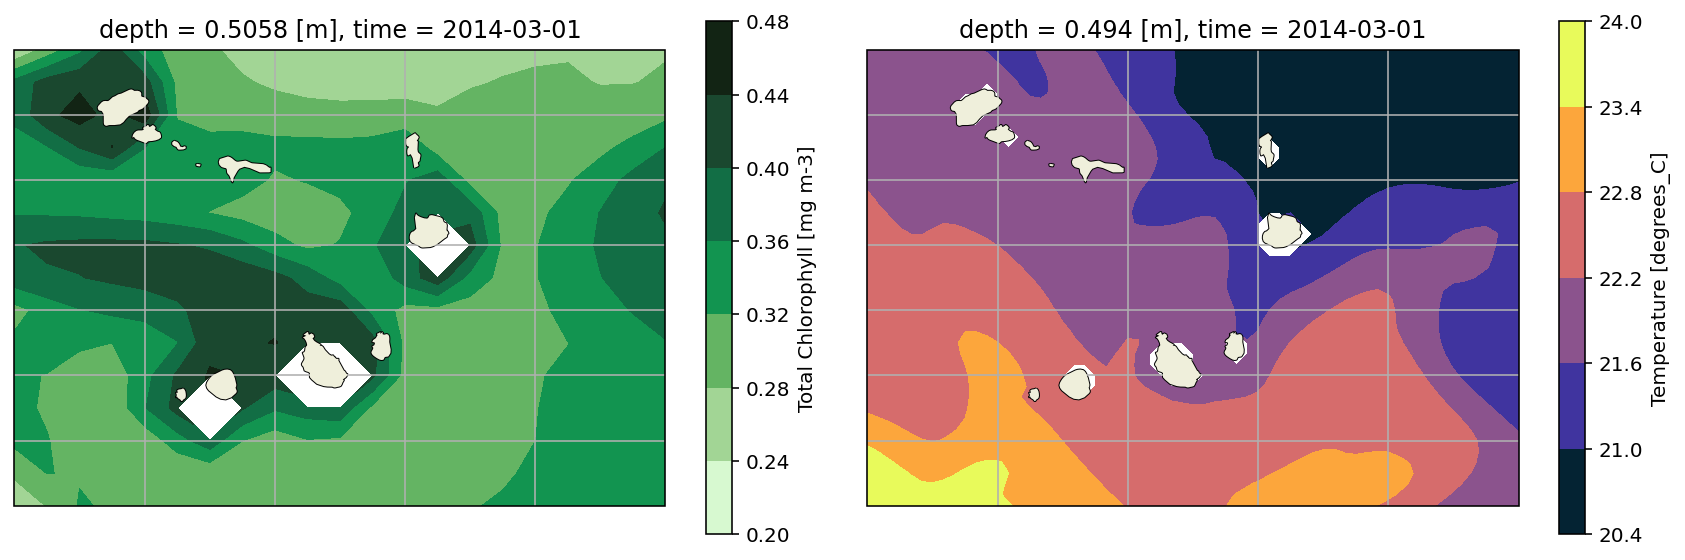

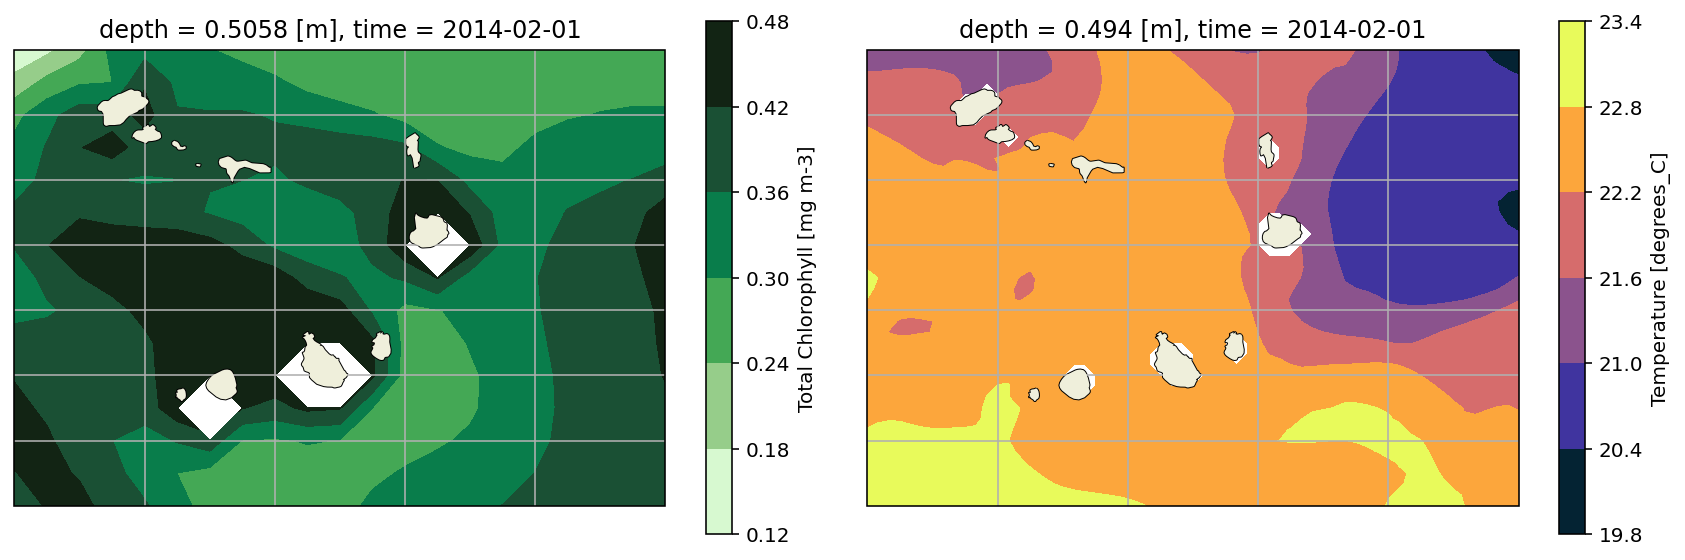

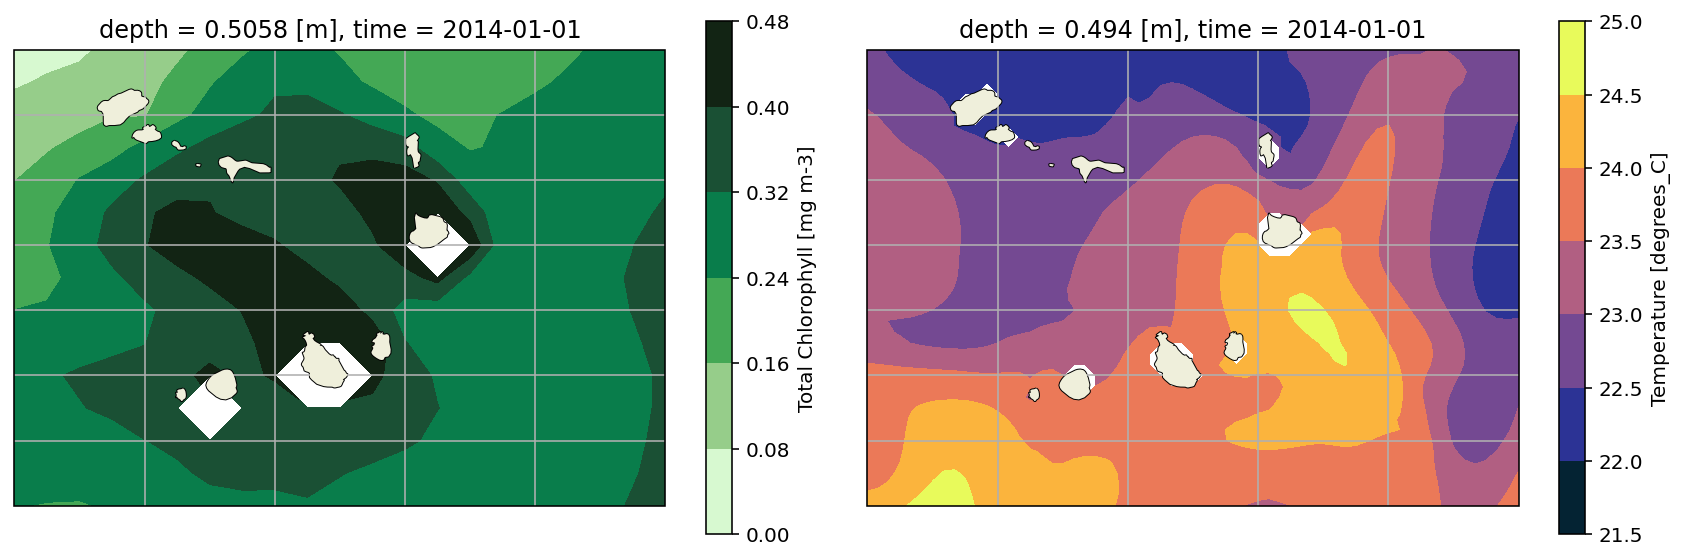

In [20]:
pn.panel(final_app).save("finapp.html", embed=True, max_states=200_000, max_opts=100)